# EXPERIMENT 1

### IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')

/tmp/ipykernel_1107/1187344447.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/raw/train.csv', sep=",")


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [4]:
pd.set_option("display.max_columns", 100)
train_data.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [5]:
train_data.describe().style.background_gradient(cmap = "Blues")

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,17036.000000,51901.000000,50010.000000,50010.000000,50010.000000,50010.000000,46627.000000,46403.000000,50010.000000,50010.000000,25298.000000,1386.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56053.000000,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091.000000
mean,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,32.926708,47.152627,0.579696,41.412401,85.319160,0.426941,15.677613,45.616480,0.227449,1.876426,1.715305,37.437150,0.775720,89.328297,4.242936,2014.536557,53.456363,0.932305,28.066087,47.052490,14.494741,40.523115,0.564080,0.323633,3.836553,4.311618,0.863570,33.254690,103.319021,103.476636,1.438807,82.827595,-2.525068,-1.896939,-0.628129,-2.525672,16.973259,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,0.009556
std,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,36.870041,49.557538,0.268678,43.730858,85.130054,0.193498,21.584619,58.060609,0.190430,5.876399,2.080477,36.813143,1.333574,30.923798,4.610406,3.450911,27.641745,0.696625,30.144876,47.582825,17.538837,44.401559,0.190824,0.171453,7.943541,8.709568,0.230396,16.651343,10.163752,11.033215,1.064868,65.344533,7.586977,5.184468,4.280805,8.304955,10.623801,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,0.097287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2009.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,4.000000,7.000000,0.500000,5.000000,13.000000,0.375000,0.000000,1.000000,0.000000,0.000000,0.900000,19.400000,-0.170944,79.383600,2.800000,2012.000000,30.600000,0.459428,4.000000,8.000000,2.000000,6.000000,0.500000,0.250000,0.000000,0.000000,0.818200,20.000000,99.013850,98.083800,0.525770,19.846900,-5.377530,-3.986970,-2.285125,-5.379030,7.307700,-4.426515,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,0.000000
50%,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,9.100000,19.100000,20.000000,31.000000,0.660000,27.000000,60.000000,0.460000,5.000000,18.000000,0.275000,0.800000,1.500000,32.800000,0.390392,94.648900,3.800000,2015.000000,55.400000,0.822562,18.000000,33.000000,8.000000,25.000000,0.580600,0.333300,0.000000,1.000000,1.000000,34.000000,103.671000,103.827000,1.266370,76.607600,-1.817550,-1.333140,-0.576564,-1.788120,16.714300,-1.580380,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,0.000000
75%,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,15.100000,24.500000,50.000000,72.000000,0.755

#### Separating categorical and numerical features

In [6]:
categorical_col = train_data.select_dtypes(include=['object'])
numerical_col = train_data.select_dtypes(exclude=['object'])

In [7]:
pd.value_counts(categorical_col['player_id'])

player_id
06dc8dc2-888e-4941-9106-4798cddfb9d2    6
fd5d7a69-da45-4f59-bf93-6f9d9b65b5f9    6
45dc9e8a-c0ff-4e99-823d-1b69bc58d75e    6
4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd    6
93f9870b-f26e-431a-bb17-b3cb52c799ae    6
                                       ..
190ff706-07a6-48e2-b117-3a986d46c5d2    1
3a39feea-bf3d-4d92-a853-a1a1eb4cc6c6    1
04ff0678-4a3c-4854-b85c-55633fa96342    1
2dc5e314-ed24-4c1a-b7ce-c83b98414eac    1
65571c18-b2b4-4ba6-84db-7357a76e6f59    1
Name: count, Length: 23929, dtype: int64

In [8]:
train_data[train_data['player_id']=='4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd']

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
2367,James Madison,CAA,28,47.1,100.3,20.3,46.3,53.72,4.8,15.6,11.3,21.5,64,74,0.865,69,135,0.511,9,43,0.209,3.3,1.2,41.6,Fr,7-Jun,NaN,1.276260,99.2791,3.4,2009,all,NaN,0.734686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.2070,103.1610,1.96431,124.2760,-0.218255,-1.138300,0.920042,-0.011971,24.5000,-0.563823,0.551853,0.9286,3.3214,4.2500,1.2857,0.5000,0.7143,8.1786,4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd,0.0
5977,James Madison,CAA,4,7.3,72.8,22.0,30.0,36.98,4.9,6.7,10.0,25.1,7,8,0.875,6,20,0.300,2,10,0.200,4.0,1.2,26.7,So,7-Jun,11,-0.660256,76.5766,2.5,2010,all,NaN,0.555556,3.0,10.0,3.0,10.0,0.3000,0.3000,1.0,1.0,1.00,NaN,106.7830,103.9710,1.87661,14.3246,-8.473510,-6.730810,-1.742700,-2.625330,24.0000,-2.964160,0.338837,1.0000,1.5000,2.5000,1.2500,0.5000,1.0000,6.2500,4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd,0.0
9992,James Madison,CAA,32,45.9,115.4,18.9,53.6,59.25,5.4,14.1,9.1,15.0,60,73,0.822,40,91,0.440,33,76,0.434,5.8,2.9,43.7,So,7-Jun,11.0,1.872690,113.4420,4.7,2011,all,NaN,0.965571,22.0,35.0,18.0,56.0,0.6286,0.3214,3.0,4.0,0.75,NaN,97.3813,96.4187,2.00359,130.2480,5.648680,2.682830,2.965850,5.343160,19.0000,2.846430,2.496730,0.8438,2.2812,3.1250,0.8750,0.9062,1.0000,7.4688,4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd,0.0
13947,James Madison,CAA,32,74.4,110.1,17.5,55.9,57.10,4.0,14.6,13.3,15.5,40,62,0.645,50,115,0.435,62,141,0.440,3.3,1.1,24.2,Jr,7-Jun,11.0,2.285600,106.4760,4.1,2012,all,NaN,1.372079,24.0,35.0,26.0,80.0,0.6857,0.3250,0.0,0.0,NaN,NaN,104.8750,106.3820,2.06245,162.6430,1.866380,1.892960,-0.026582,1.797080,30.0000,2.126920,-0.329848,1.0312,3.7188,4.7500,1.8438,0.5312,0.9375,10.1875,4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd,0.0
18431,James Madison,CAA,7,9.4,130.8,21.5,59.0,61.78,5.1,12.5,14.7,4.2,11,14,0.786,10,22,0.455,13,28,0.464,3.4,3.6,28.0,Sr,7-Jun,11,3.090550,130.2240,4.7,2013,all,NaN,4.000350,4.0,9.0,6.0,13.0,0.4444,0.4615,1.0,1.0,1.00,NaN,97.0275,99.5108,1.76098,26.8434,8.211770,7.223290,0.988479,8.231760,19.5714,6.617170,1.614590,0.8571,2.0000,2.8571,1.1429,1.1429,0.5714,10.0000,4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd,0.0
23029,James Madison,CAA,28,64.7,98.8,22.2,45.6,50.36,4.2,12.3,10.2,16.1,67,88,0.761,48,119,0.403,47,141,0.333,1.8,1.5,33.8,Sr,7-Jun,11,1.322730,100.9850,3.8,2014,all,NaN,0.702133,28.0,49.0,20.0,70.0,0.5714,0.2857,1.0,1.0,1.00,NaN,106.6370,107.7780,2.17831,130.7730,-1.380990,-0.217425,-1.163560,-1.166260,28.7857,0.023669,-1.189930,1.0357,3.0714,4.1071,1.1786,0.7143,0.4286,10.8571,4ba82bbe-4274-4f50-bcdf-8ca1a7af21fd,0.0


In [9]:
pd.value_counts(test_data['player_id'])

player_id
cf302b4d-84f7-4124-a25d-a75eed31978b    1
d3cca71f-6dcb-48a2-867b-2fa608664778    1
65fcfb9b-109e-4356-9d3b-baaaf92aad28    1
81c2c46e-4650-4d76-9d8f-c2e3f878e391    1
185d33ef-0374-4975-a7be-4750c95dfba2    1
                                       ..
0cef0a14-5363-45c0-bbec-abb105478ad5    1
f08ab038-fdf3-4f55-9f1a-153af0004f45    1
28fc6d16-30fe-4711-93b7-0adf4e6fe8c9    1
f3bde4f6-d391-488a-b64f-22016bf06fec    1
18b51f5d-4746-4121-88fd-c8d0a1399130    1
Name: count, Length: 4970, dtype: int64

In [10]:
for cat in categorical_col:
    print(pd.value_counts(categorical_col[cat]))

team
Army                   209
Air Force              202
Cornell                199
Arkansas Pine Bluff    198
Navy                   196
                      ... 
Centenary               40
Winston Salem St.       30
Cal Baptist             25
North Alabama           25
Merrimack               11
Name: count, Length: 358, dtype: int64
conf
ACC     2297
A10     2268
SEC     2199
B10     2123
CUSA    2113
MEAC    2027
Slnd    2008
BE      1977
MAC     1914
SB      1857
SWAC    1775
SC      1770
OVC     1769
BSth    1723
B12     1714
NEC     1690
CAA     1640
MAAC    1638
BSky    1635
Pat     1589
MWC     1589
MVC     1546
Horz    1523
P12     1501
WCC     1491
Ivy     1478
ASun    1463
BW      1435
AE      1394
Sum     1372
WAC     1347
Amer    1047
ind      429
P10      415
GWC      324
Ind       11
Name: count, dtype: int64
yr
Jr      14923
Fr      14906
So      13252
Sr      12711
0           5
57.1        1
42.9        1
Name: count, dtype: int64
ht
7-Jun     5578
8-Jun     5498


#### EXPLORING NUMERICAL CORRELATIONS AND IMBALANCES IN TARGET VARIABLE

In [11]:
def plot_count(df, col, hue):
    graph = sns.countplot(data=df, x=df[col], hue=hue)
    plt.show()

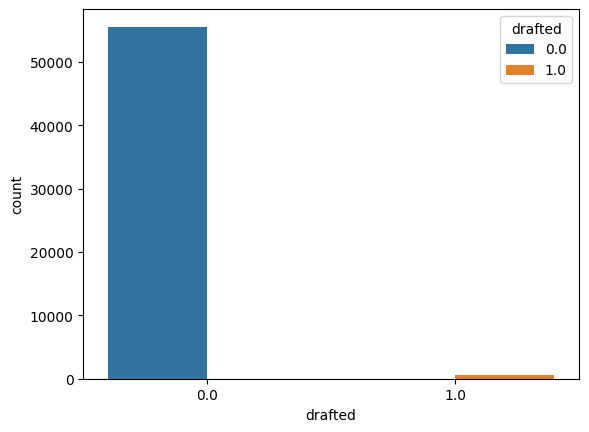

In [12]:
plot_count(train_data, 'drafted', 'drafted')

In [13]:
pd.value_counts(train_data['drafted'])

drafted
0.0    55555
1.0      536
Name: count, dtype: int64

In [14]:
corr = numerical_col.corr()

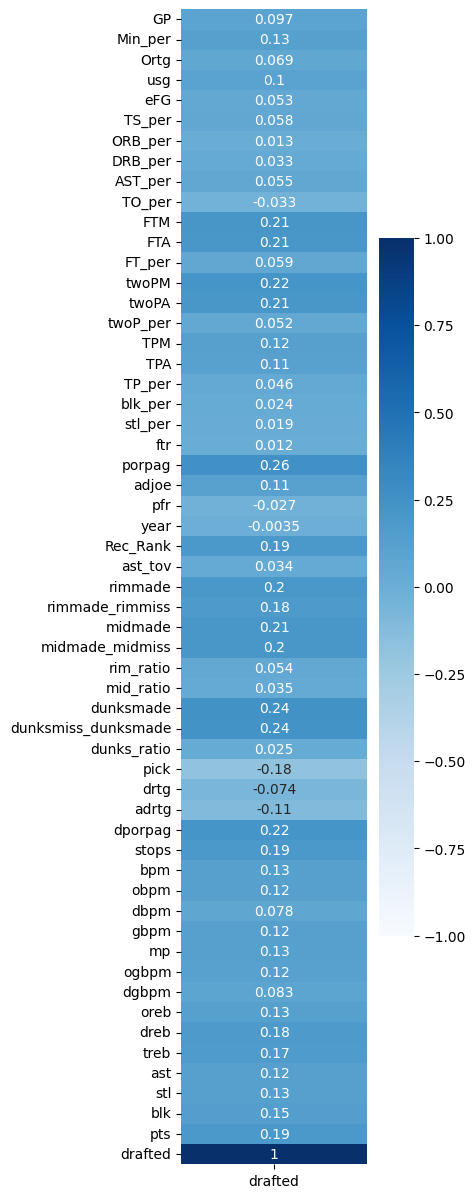

In [15]:
# !pip install seaborn
plt.figure(figsize=(3, 15))
heatmap = sns.heatmap(corr[['drafted']], vmin=-1, vmax=1, cmap='Blues', annot=True)

In [16]:
cat_col = categorical_col.columns
cat_col = cat_col.drop('player_id')
train_data_num_features = train_data.drop(cat_col, axis=1)

In [17]:
train_data_num_features.isna().sum()

GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
porpag                     0
adjoe                      0
pfr                        0
year                       0
Rec_Rank               39055
ast_tov                 4190
rimmade                 6081
rimmade_rimmiss         6081
midmade                 6081
midmade_midmiss         6081
rim_ratio               9464
mid_ratio               9688
dunksmade     

In [18]:
train_data_num_features[~train_data_num_features['pick'].isna()]

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
33,31,86.2,104.3,30.8,43.1,50.76,2.7,11.9,32.6,18.5,183,223,0.821,166,396,0.419,30,94,0.319,1.4,2.4,45.5,4.021670,117.8840,3.1,2009,NaN,1.276195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,97.5891,98.6127,3.30834,199.3900,3.422580,2.775530,0.647047,4.614900,35.0323,3.448400,1.166500,0.9032,3.8387,4.7419,4.3226,1.4194,0.4516,19.5161,0c85d8a7-bb9c-47b9-b6e7-a96f5ffa4b97,0.0
100,35,47.4,82.0,19.7,44.0,48.56,9.5,12.4,7.9,32.2,48,76,0.632,62,141,0.440,0,0,0.000,3.8,2.0,53.9,0.032054,84.7537,4.2,2009,82.0,0.361139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,95.6378,89.4357,2.42557,125.8340,0.297536,-3.124070,3.421610,-0.868858,19.1143,-2.977750,2.108890,1.4857,2.2286,3.7143,0.7429,0.6571,0.6571,4.9143,e9c88f6e-209f-4b86-9c3e-22e8df63287d,0.0
102,37,80.4,111.8,26.0,51.4,54.90,10.6,16.7,15.5,17.0,124,174,0.713,139,292,0.476,69,180,0.383,3.1,2.8,36.9,4.714590,126.5120,3.3,2009,99.0,0.967384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,92.1514,86.4901,4.43913,255.6060,9.729550,6.100490,3.629060,9.212470,32.2703,6.739510,2.472960,3.0270,4.6486,7.6757,2.4054,1.5405,1.0270,16.4595,e631da41-211e-460e-9d0c-c58e6638ead1,0.0
103,34,49.5,105.3,20.6,48.5,53.84,3.5,8.0,15.2,20.9,62,73,0.849,71,152,0.467,27,78,0.346,0.3,2.5,31.7,2.015530,111.2350,3.8,2009,95.8,1.054587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,97.6446,92.0009,2.56099,124.6440,2.858910,2.196600,0.662308,2.655750,21.6176,1.067750,1.588000,0.6765,1.5000,2.1765,1.7059,0.9412,0.0588,8.3824,0a8977fa-5029-49d8-9c44-6a5698c7e237,0.0
104,37,81.9,98.4,25.1,48.5,51.73,3.9,12.1,19.8,19.2,80,105,0.762,132,279,0.473,56,166,0.337,1.4,2.0,23.6,2.943050,110.1650,3.0,2009,95.0,1.144339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,91.8836,87.4982,4.40566,218.3140,4.885350,2.358840,2.526520,4.350620,33.0811,2.376390,1.974240,1.0541,3.5676,4.6216,3.0000,1.0811,0.4324,13.8378,f15ad637-c953-4cbe-a648-2b6ea10254f8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55828,31,81.3,105.7,19.8,49.6,55.24,9.1,23.2,11.2,20.2,79,97,0.814,92,185,0.497,21,64,0.328,1.7,2.0,39.0,2.915150,111.1790,2.8,2020,97.0,0.882380,75.0,121.0,17.0,64.0,0.6198,0.2656,16.0,18.0,0.8889,32.0,93.9931,88.4744,4.38508,219.0130,5.584480,1.604060,3.980420,4.370300,32.6452,1.813250,2.557050,2.5484,6.8065,9.3548,1.9355,1.1290,0.5484,10.5161,fd76d3a2-f843-48c4-9cfc-7c032ff364c5,0.0
55841,31,81.3,103.0,28.8,47.0,51.73,2.4,14.5,17.9,15.4,127,165,0.770,126,251,0.502,69,237,0.291,1.6,2.3,33.8,3.753330,118.5820,2.7,2020,99.8,1.045976,89.0,129.0,37.0,122.0,0.6899,0.3033,27.0,27.0,1.0000,1.0,102.7740,98.2752,3.28191,198.3110,3.965190,3.541890,0.423291,4.928480,33.0312,4.385540,0.542943,0.7500,4.4688,5.2188,2.8438,1.3438,0.5625,19.0625,fae379c3-98df-43b9-91e0-9ac5663fa670,1.0
55859,31,85.4,104.7,22.1,47.4,53.06,1.4,12.1,18.3,16.6,100,120,0.833,117,238,0.492,33,113,0.292,1.3,1.5,34.2,3.061800,111.1590,2.8,2020,98.2,1.447740,71.0,109.0,46.0,129.0,0.6514,0.3566,7.0,10.0,0.7000,21.0,98.2544,94.2306,3.92659,186.7240,4.109950,2.791540,1.318420,3.430910,34.4516,1.942460,1.488450,0.3871,3.9032,4.2903,3.1290,0.8710,0.3871,13.9677,92c9fe17-f0ef-429f-87b6-a56bc814e120,1.0
55863,27,36.5,99.7,13.2,54.6,56.10,7.1,15.8,4.3,23.3,14,22,0.636,31,52,0.596,7,24,0.292,6.8,1.9,28.9,0.553901,94.8552,4.7,2020,89.8,0.434793,28.0,37.0,3.0,15.0,0.7568,0.2000,22.0,24.0,0.9167,19.0,92.1376,87.8445,2.29944,94.9982,5.047300,-0.872178,5.919480,3.566310,16.7778,-0.597038,4.163350,1.0000,2.2222,3.2222,0.3704,0.5185,1.1111,

#### REPLACING ALL THE NA VALUES WITH 0 FOR EXPERIMENT 1

In [19]:
train_data_num_features = train_data_num_features.fillna(0)

In [20]:
train_data_num_features.isna().sum()

GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
porpag                 0
adjoe                  0
pfr                    0
year                   0
Rec_Rank               0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
dunks_ratio            0
pick                   0
drtg                   0
adrtg                  0


#### USING LOGISTIC REGRESSION MODEL WITH CROSS VALIDATION FOR RIGID MODEL TESTING PERFORMANCE

In [21]:
def get_score_values(scores):
    print("Precision Score: " + str(scores['test_precision'].mean()) + " +- " + str(scores['test_precision'].std()))
    print("Recall Score: " + str(scores['test_recall'].mean()) + " +- " + str(scores['test_recall'].std()))
    print("F1 Score: " + str(scores['test_f1'].mean()) + " +- " + str(scores['test_f1'].std()))
    print("AUC score: " + str(scores['test_roc_auc'].mean()) + " +- " + str(scores['test_roc_auc'].std()))


In [22]:
y_train = train_data_num_features[['drafted']]
X_train = train_data_num_features.drop(['drafted', 'player_id'], axis=1)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scoring = ['precision', 'recall', 'f1', 'roc_auc']
cross_val = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1))
get_score_values(cross_val)
cross_val
model.fit(X_train, y_train)
filename = '../models/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

/home/ronik/.cache/pypoetry/virtualenvs/at1-kaggle-package-uuYRLuG6-py3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/pypoetry/virtualenvs/at1-kaggle-package-uuYRLuG6-py3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/pypoetry/virtualenvs/at1-kaggle-package-uuYRLuG6-py3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/

Precision Score: 0.6524652709866124 +- 0.07066773435497443
Recall Score: 0.4757512229210342 +- 0.05874206797919841
F1 Score: 0.5461842843634637 +- 0.03909009368027537
AUC score: 0.9948961585487552 +- 0.0009852079812281702


/home/ronik/.cache/pypoetry/virtualenvs/at1-kaggle-package-uuYRLuG6-py3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/pypoetry/virtualenvs/at1-kaggle-package-uuYRLuG6-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
cat_col = categorical_col.columns
cat_col = cat_col.drop('player_id')
test_data_num_features = test_data.drop(cat_col, axis=1)

In [24]:
test_data_num_features = test_data_num_features.set_index('player_id')

In [25]:
test_data_num_features = test_data_num_features.fillna(0)

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))
result = pd.DataFrame(loaded_model.predict_proba(test_data_num_features))[1]

In [27]:
test_data_num_features = test_data_num_features.reset_index()

In [28]:
test_data_num_features['drafted'] = result

In [29]:
result = test_data_num_features[['player_id','drafted']]

In [37]:
result = result.drop('zero', axis=1)

In [40]:
result['drafted'] = 0.0

In [41]:
result

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.0
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.0
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.0
3,32402798-471c-4a54-8cb4-29cd95199014,0.0
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.0
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.0
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.0
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.0
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.0


In [42]:
result.to_csv('draft_score_naive.csv', index=False)